In [33]:
import torch
import torch.nn as nn
import numpy as np
import torchvision
import matplotlib.pyplot as plt
import pandas as pd
from torch.utils.data import Dataset,DataLoader

In [87]:
link='C:/Users/NavneethBhat/Desktop/Code/Implementations/data/train.csv/train.csv'

In [88]:
class DigitDataset(Dataset):
    def __init__(self,link):
        dataset=pd.read_csv(link,dtype=np.float32)
        y=dataset['label'].values
        x=dataset.drop('label',axis=1).values
        self.x=torch.from_numpy(x)
        self.y=torch.from_numpy(y)
        
    def __getitem__(self,idx):
        return self.x[idx],self.y[idx]
    
    def __len__(self):
        return self.x.shape[0]

In [89]:
data=DigitDataset(link)

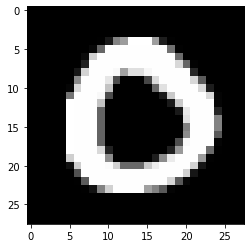

In [27]:
pixels,_=data[4]
pixels=pixels.view((28,28))
plt.imshow(pixels,cmap='gray')

In [20]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [84]:
input_size=784
hidden_size=100
num_classes=10
num_epochs=30
batch_size=100
learning_rate=2e-5

dataset define->hyperparameters->dataload->model->optimizer and loss function->train->test

In [90]:
train_loader=DataLoader(dataset=data,batch_size=batch_size,shuffle=True)

In [75]:
class Net(nn.Module):
    def __init__(self):
        #
        self.c1=nn.Conv2d
    
    def forward(self,x):
        return out

In [76]:
model=Net().to(device)

Net(
  (l1): Linear(in_features=784, out_features=100, bias=True)
  (relu): ReLU()
  (l2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (l3): Linear(in_features=100, out_features=10, bias=True)
)

In [85]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

In [91]:
for epoch in range(num_epochs):
    for i,(images,labels) in enumerate(train_loader):
        labels=labels.type(torch.LongTensor)
        images=images.to(device)
        labels=labels.to(device)
        preds=model(images)
        loss=criterion(preds,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(loss)

tensor(0.4027, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2929, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3542, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3100, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1587, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.4163, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.3120, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0383, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0930, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1235, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1296, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1005, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0806, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1124, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0493, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1413, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0563, device='cuda:0', grad_fn=

In [101]:
train_loader1=DataLoader(dataset=data,shuffle=True)
a,b=next(iter(train_loader1))

In [97]:
a

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [111]:
with torch.no_grad():
    a=a.to(device)
    op=model(a)
    pred=torch.max(op.data)
    print(pred)
    print(b)

tensor(12.8936, device='cuda:0')
tensor([9.])


In [117]:
torch.save(model.state_dict(),'C:/Users/NavneethBhat/Desktop/vals')